In [1]:
import networkx as nx

from networkx.drawing import nx_pydot
from graphviz import Source

In [2]:
def set_to_latex(_set: set) -> str:
	
	_list = list(_set)

	length = len(_list)
	format = "\{"

	_length = length - 1

	for i in range(length):
		element = _list[i]

		if isinstance(element, (set, list, tuple)):
			element = set_to_latex(element)

		if i == _length:
			format += f"{element}\{'}'}"
		else:
			format += f"{element}, "

	return format


def is_reflexive(R: set, A: set) -> bool:
	for a in A:
		if (a, a) not in R:
			return False
	
	return True

def is_symmetric(R: set) -> bool:
	for (a, b) in R:
		if (b, a) not in R:
			return False

	return True

def is_antisymmetric(R: set) -> bool:
	return not is_symmetric(R)

def is_transitive(R: set) -> bool:
	for (a, b) in R:
		for (_b, c) in R:
			if b == _b:
				continue

			if (a, c) not in R:
				return False


	return True

def get_composition(R: set, S: set) -> set:
	RS = []

	for (a, b) in R:
		for (_b, c) in S:
			if b != _b:
				continue

			if (a, c) not in RS:
				RS.append((a, c))
	
	return RS

def draw_directed_graph(R: set):
	G = nx.MultiDiGraph()

	for (a, b) in R:
		G.add_edge(a, b)
	
	nx_pydot.write_dot(G, 'multig.dot')


Jojenn Fernandez <br>
BSIT - 1 <br>
September 7, 2023 <br>
CIS 1103 Group 5 <br>

# 1. Given $A = \{1,2,3,4\}$ and $B = \{x,y,z\}$. <hr>

Let $R$ be a relation from $A \to B$

$R = \{\{1, y\}, \{1, z}, \{3, y}, \{4, x}, \{4, z}}

1. Find all $aRb$.
2. Find $R^{-1}$.
3. Determine the domain and range of $R$.
4. Check if $R$ is reflexive relation.
5. Check if $R$ is a symmetric relation.


# 1. Find all $aRb$.


- $aRb = {(a, b)|(a, b) \in R}$
- $\therefore = {(1, y),(1, z),(3, y),(4, x), (4, z)}$

# 2. Find $R^{-1}$.


- $R^{-1} = \{(b,a)|(a,b) \in R\}$
- $\therefore R^{-1} = \{\{y,1\},\{z,1\},\{y,3\},\{z,4\}\}$

# 3. Determine the domain and range of $R$.

- Domain: $\{a|(a,b) \in R\}$
- Range: $\{b|(a,b) \in R\}$
- $\therefore$ The domain of $R$ is $\{1,3,4\}$, and the range is $\{x,y,z\}$

# 4. Check if $R$ is a reflexive relation.

- It is stated that $R$ is a relation from $A \to B$
- A relation $A \to B$ cannot be reflexive, since reflexive is a relation from $A \to A$.
- $A$ = $\{1,2,3,4\}$, and for every element in $A$, there is no pair $(a,a)$ in $R$.
- The same applies with $B$.
- $\therefore$ $R$ is **not** a reflexive relation.

In [3]:
A = {1, 2, 3, 4}
B = {'x', 'y', 'z'}

R = {(1, 'y'), (1, 'z'), (3, 'y'), (4, 'x'), (4, 'z')}

print(f"Relation: {R}")
print(f"Reflexive with A: {is_reflexive(R, A)}")
print(f"Reflexive with B: {is_reflexive(R, B)}")

Relation: {(1, 'z'), (1, 'y'), (4, 'x'), (4, 'z'), (3, 'y')}
Reflexive with A: False
Reflexive with B: False


# 5. Check if $R$ is a symmetric relation.

- A relation is symmetric if $(a,b) \in R$ then $(b,a) \in R$.
- Check if every pair of elements of $R$:
    
    - $(1, y)$ is in $R$ $(y, 1)$ is not in $R$.
    - $(1, z)$ is in $R$ $(z, 1)$ is not in $R$.
    - $(3, y)$ is in $R$ $(y, 1)$ is not in $R$.
    - $(4, x)$ is in $R$ $(x, 4)$ is not in $R$.
    - $(4, z)$ is in $R$ $(z, 4)$ is not in $R$.

- $\therefore R$ is **not** a symmetric relation.
    


In [4]:
R = {(1, 'y'), (1, 'z'), (3, 'y'), (4, 'x'), (4, 'z')}

print(f"Relation: {R}")
print(f"Symmetric: {is_symmetric(R)}")

Relation: {(1, 'z'), (1, 'y'), (4, 'x'), (4, 'z'), (3, 'y')}
Symmetric: False


# 2. Given $A$ = {1, 2, 3, 4} $B$ = {a, b, c} and $C$ = {x, y, z} 

<hr>

Let $R$ be a relation from A $ \to B$:

$R = \{\{1, b\}, \{2, a\}, \{2, c\}\}$

Also let $S$ be a relation from $B \to C$:

$S = \{\{a, y\}, \{b, x\}, \{c, y\}, \{c, z\}\}$

1. Find the composition relation $R \circ S$/
2. Find $R^{-1}$.
3. Find $S^{-1}$.
4. Determine the domain and range of $R$.
5. Check if $R$ is a reflexive relation.
6. Check if $R$ is a symmetric relation.
7. Determine the domain and range of $S$.
8. Check if $S$ is a reflexive relation.
9. Check if $S$ is a symmetric relation.


# 1. Find the composition relation $R \circ S$.

- If some $b \in B$ we have $aRb$ and $bSc$.
- $R \circ S = \{(a, c) | \exists b \in B$ for which $(a,b) \in R$ and $(b,c) \in S \}$
- $\therefore \ R \circ S =\{\{1, x\}, \{2, y\}, \{2, z\}\}$

## 2. Find $R^{-1}$.

- $R^{-1} = \{(b, a) | (a, b) \in R\}$
- $\therefore \ R^{-1} = \{\{a, 2\}, \{b, 1\}, \{c, 2\}\}$

## 3. Find $S^{-1}$.

- $S^{-1} = \{(b, a) | (a, b) \in S\}$
- $\therefore \ S^{-1} = \{\{x, b\}, \{y, a\}, \{y, c\}, \{z, c\}\}$

## 4. Determine the domain and range of $R$.

- Domain: $\{a | (a, b) \in R\}$
- Range: $\{b | (a, b) \in R\}$
- $\therefore$ The domain of $R$ is $\{1, 2\}$, and the range is $\{a, b, c\}$

## 5. Check if $R$ is a reflexive relation.

- $R$ is a relation from $A \to B$.
- A relation $A \to B$ cannot be reflexive, since reflexive relation is from $A \to A$.
- $A = \{1, 2, 3, 4\}$, and for every element in $A$, there is no pair $(a, a)$ in $R$.
- The same applies with $B$.
- $\therefore \ R$ is **not** a reflexive relation.

In [5]:
A = {1, 2, 3, 4}
B = {'a', 'b', 'c'}

R = {(1, 'b'), (2, 'a'), (2, 'c')}

print(f"Relation: {R}")
print(f"Reflexive  with A: {is_reflexive(R, A)}")
print(f"Reflexive  with B: {is_reflexive(R, A)}")

Relation: {(2, 'a'), (1, 'b'), (2, 'c')}
Reflexive  with A: False
Reflexive  with B: False


## 6. Check if $R$ is a symmetric relation.

- A relation is symmetric if $(a, b) \in R$ and $(b, a) \in R$.
- Lets check every pair of elements of $R$:
  - $(1, b)$ is in $R$, $(b, 1)$ is not in $R$.
  - $(2, a)$ is in $R$, $(a, 2)$ is not in $R$.
  - $(2, c)$ is in $R$, $(c, 2)$ is not in $R$.
- $\therefore \ R$ is **not** symmetric relation.

In [6]:
R = {(1, 'b'), (2, 'a'), (2, 'c')}

print(f"Relation: {R}")
print(f"Symmetric: {is_symmetric(R)}")

Relation: {(2, 'a'), (1, 'b'), (2, 'c')}
Symmetric: False


## 7. Determine the domain and range of $S$.

- Domain: $\{a | (a, b) \in S\}$
- Range: $\{b | (a, b) \in S\}$
- $\therefore$ The domain of $S$ is $\{a, b, c\}$, and the range is $\{x, y, z\}$

## 8. Check if $S$ is a reflexive relation.

- $S$ is a relation from $B \to C$.
- A relation $B \to C$ cannot be reflexive, since reflexive relation is from $A \to A$.
- $B = \{a, b, c\}$, and for every element in $B$, there is no pair $(a, a)$ in $S$.
- The same applies with $C$.
- $\therefore \ S$ is **not** a reflexive relation.

In [7]:
B = {'a', 'b', 'c'}
C = {'x', 'y', 'z'}

S = {('a', 'y'), ('b', 'x'), ('c', 'y'), ('c', 'z')}

print(f"Relation: {S}")
print(f"Reflexive with B: {is_reflexive(S, B)}")
print(f"Reflexive with C: {is_reflexive(S, C)}")

Relation: {('a', 'y'), ('c', 'y'), ('b', 'x'), ('c', 'z')}
Reflexive with B: False
Reflexive with C: False


## 9. Check if $S$ is a symmetric relation.

- A relation is symmetric if $(a, b) \in S$ and $(b, a) \in S$.
- Lets check every pair of elements of $S$:
  - $(a, y)$ is in $S$, $(y, a)$ is not in $S$.
  - $(b, x)$ is in $S$, $(x, b)$ is not in $S$.
  - $(c, y)$ is in $S$, $(y, c)$ is not in $S$.
  - $(c, z)$ is in $S$, $(z, c)$ is not in $S$.
- $\therefore \ S$ is **not** symmetric relation.

In [8]:
S = {('a', 'y'), ('b', 'x'), ('c', 'y'), ('c', 'z')}

print(f"Relation: {S}")
print(f"Symmetric: {is_symmetric(S)}")

Relation: {('a', 'y'), ('c', 'y'), ('b', 'x'), ('c', 'z')}
Symmetric: False


# 3. Given $A = \{1, 2, 3, 4\}$.<hr />

Let $R$ be a relation from $A \to B$:

$R = \{\{1, 1\},\{2, 2\},\{2, 3\},\{3, 2\},\{4, 2\},\{4, 4\}\}$

1. Find the composition relation $R \circ R$.
2. Draw the directed graph of $R^{-1}$.
3. Draw the directed graph of $R$.

## 1. Find the composition relation of $R \circ R$.

- If some $b \in B$ we have $aRb$ and $bRc$.
- $R \circ R = \{(a, c) | \exists b \in B$ for which $(a, b) \in R$ and $(b, c) \in R \}$
- $\therefore \ R \circ R = \{\{1, 1\}, \{2, 2\}, \{2, 3\}, \{3, 2\}, \{3, 3\}, \{4, 2\}, \{4, 3\}, \{4, 4\}\}$

## 2. Draw the directed graph of $R^{-1}$.

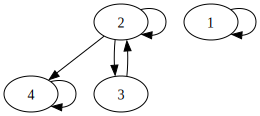

In [9]:
R = {(1, 1,), (2, 2), (2, 3), (3, 2), (4, 2), (4, 4)}

inverse_R = {(b, a) for (a, b) in R}

draw_directed_graph(inverse_R)
Source.from_file('multig.dot')


## 3. Draw the directed graph of $R$.

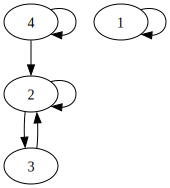

In [10]:
R = {(1, 1,), (2, 2), (2, 3), (3, 2), (4, 2), (4, 4)}

draw_directed_graph(R)
Source.from_file('multig.dot')


# 4. Let $R$ and $S$ be relations on $A = \{1, 2, 3\}$<hr />

$R = \{\{2, 3\}, \{1, 2\}, \{3, 3\}, \{3, 1\}, \{1, 1\}\}$

$S = \{\{1, 2\}, \{3, 3\}, \{1, 3\}, \{2, 1\}\}$

1. $R \cup S$.
2. $R \cap S$.
3. $R^c$.
4. $R \circ S$.
5. $S \circ S$.

## 1. $R \cup S$.

- $R \cup S = \{\{2, 3\}, \{1, 2\}, \{3, 3\}, \{3, 1\}, \{1, 1\}\} \cup \{\{1, 2\}, \{3, 3\}, \{1, 3\}, \{2, 1\}\}$
- $\therefore \ R \cup S = \{\{1, 1\}, \{1, 2\}, \{1, 3\}, \{2, 1\}, \{2, 3\}, \{3, 1\}, \{3, 3\}\}$

## 2. $R \cap S$.

- $R \cap S = \{\{2, 3\}, \{1, 2\}, \{3, 3\}, \{3, 1\}, \{1, 1\}\} \cap \{\{1, 2\}, \{3, 3\}, \{1, 3\}, \{2, 1\}\}$
- $\therefore \ R \cap S = \{\{1, 2\}, \{3, 3\}\}$

## 3. $R^c$.

- $R^c = (A \times A) \setminus R$
- $R^c = \{\{1, 2\}, \{2, 1\}, \{3, 1\}, \{1, 1\}, \{2, 3\}, \{3, 3\}, \{2, 2\}, \{3, 2\}, \{1, 3\}\} \setminus \{\{2, 3\}, \{1, 2\}, \{3, 3\}, \{3, 1\}, \{1, 1\}\}$
- $\therefore \ R^c = \{\{1, 3\}, \{2, 1\}, \{2, 2\}, \{3, 2\}\}$

## 4. $R \circ S$.

- $R \circ S = \{(a, c) | \exists b \in B$ for which $(a, b) \in R$ and $(b, c) \in S \}$
- $\therefore R \circ S = \{\{1, 1\}, \{1, 2\}, \{1, 3\}, \{2, 3\}, \{3, 2\}, \{3, 3\}\}$

## 5. $S \circ S$.

- $S \circ S = \{(a, c) | \exists b \in B$ for which $(a, b) \in S$ and $(b, c) \in S \}$
- $\therefore S \circ S = \{\{1, 1\}, \{1, 3\}, \{2, 2\}, \{2, 3\}, \{3, 3\}\}$



# 5. Consider the five relations on the set $A = \{1, 2, 3\}$<hr />

$R = \{\{1, 1\}, \{1, 2\}, \{1, 3\}, \{3, 3\}\}$

$S = \{\{1, 2\}, \{3, 3\}, \{2, 1\}, \{2, 2\}, \{1, 1\}\}$

$T = \{\{2, 3\}, \{1, 1\}, \{1, 2\}, \{2, 2\}\}$

Which of the relations above are:
1. Reflexive.
2. Symmetric or anti-symmetric.
3. Transitive.

## 1. Reflexive.

- $R$ does not contain a pair $(2, 2)$.
- $T$ does not contain a pair $(3, 3)$.
- $R$ and $T$ are not reflexive, since $R$ and $T$ does not contain every pair of element $(a, a)$ in $A$.
- $S$ is reflexive, since every pair of elements of $A$ are in $R$.
- $\therefore \ S$ is the only reflexive relation.

In [11]:
A = {1, 2, 3}

R = {(1, 1), (1, 2), (1, 3), (3, 3)}
S = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3)}
T = {(1, 1), (1, 2), (2, 2), (2, 3)}

print(f"R reflexive: {is_reflexive(R, A)}")
print(f"S reflexive: {is_reflexive(S, A)}")
print(f"T reflexive: {is_reflexive(T, A)}")

R reflexive: False
S reflexive: True
T reflexive: False


## 2. Symmetric or anti-symmetric.

- Lets check every pair of elements of $R$:
  - $(1, 1)$ is in $R$, $(1, 1)$ is in $R$.
  - $(1, 2)$ is in $R$, $(2, 1)$ is not in $R$.
  - $(1, 3)$ is in $R$, $(3, 1)$ is not in $R$.
  - $(3, 3)$ is in $R$, $(3, 3)$ is in $R$.
- Lets check every pair of elements of $S$:
  - $(1, 1)$ is in $S$, $(1, 1)$ is in $S$.
  - $(1, 2)$ is in $S$, $(2, 1)$ is in $S$.
  - $(2, 1)$ is in $S$, $(1, 2)$ is in $S$.
  - $(2, 2)$ is in $S$, $(2, 2)$ is in $S$.
  - $(3, 3)$ is in $S$, $(3, 3)$ is in $S$.
- Lets check every pair of elements of $T$:
  - $(1, 1)$ is in $T$, $(1, 1)$ is in $T$.
  - $(1, 2)$ is in $T$, $(2, 1)$ is not in $T$.
  - $(2, 2)$ is in $T$, $(2, 2)$ is in $T$.
  - $(2, 3)$ is in $T$, $(3, 2)$ is not in $T$.
- $\therefore \ S$ is the only symmetric, while $R$ and $T$ are anti-symmetric.

In [12]:
R = {(1, 1), (1, 2), (1, 3), (3, 3)}
S = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3)}
T = {(1, 1), (1, 2), (2, 2), (2, 3)}

print(f"R symmetric: {is_symmetric(R)}")
print(f"S symmetric: {is_symmetric(S)}")
print(f"T symmetric: {is_symmetric(T)}\n")

print(f"R antisymmetric: {is_antisymmetric(R)}")
print(f"S antisymmetric: {is_antisymmetric(S)}")
print(f"T antisymmetric: {is_antisymmetric(T)}")


R symmetric: False
S symmetric: True
T symmetric: False

R antisymmetric: True
S antisymmetric: False
T antisymmetric: True


## 3. Transitive.

- If $(a, b) \in R$ and $(b, c) \in R$ then $(a, c) \in R, \forall \ a, b, c \in R$.
- Only check $(a, b)$ of $R$ and $(b, c)$ of $R$, where in $(a, c) \notin R$:
  - $(3, 3)$ and $(3, 1)$ are in $R$, $(3, 1)$ is not in $R$.
  - $(3, 3)$ and $(3, 2)$ are in $R$, $(3, 2)$ is not in $R$.
- Only check $(a, b)$ of $S$ and $(b, c)$ of $S$, where in $(a, c) \notin S$.
  - $(1, 2)$ and $(2, 3)$ are in $S$, $(1, 3)$ is not in $S$
  - $(3, 3)$ and $(3, 2)$ are in $S$, $(3, 2)$ is not in $S$
  - $(3, 3)$ and $(3, 1)$ are in $S$, $(3, 1)$ is not in $S$
  - $(3, 3)$ and $(3, 2)$ are in $S$, $(3, 2)$ is not in $S$
  - $(3, 3)$ and $(3, 1)$ are in $S$, $(3, 1)$ is not in $S$
  - $(2, 1)$ and $(1, 3)$ are in $S$, $(2, 3)$ is not in $S$
  - $(2, 2)$ and $(2, 3)$ are in $S$, $(2, 3)$ is not in $S$
  - $(1, 1)$ and $(1, 3)$ are in $S$, $(1, 3)$ is not in $S$
- Only check $(a, b)$ of $T$ and $(b, c)$ of $T$, where in $(a, c) \notin T$.
  - $(2, 3)$ and $(3, 1)$ are in $T$, $(2, 1)$ is not in $T$
  - $(1, 1)$ and $(1, 3)$ are in $T$, $(1, 3)$ is not in $T$
  - $(2, 2)$ and $(2, 1)$ are in $T$, $(2, 1)$ is not in $T$
- $\therefore \ R, S,$ and $T$ are not transitive.

In [13]:
R = {(1, 1), (1, 2), (1, 3), (3, 3)}
S = {(1, 1), (1, 2), (2, 1), (2, 2), (3, 3)}
T = {(1, 1), (1, 2), (2, 2), (2, 3)}

print(f"R transitive: {is_transitive(R)}")
print(f"R transitive: {is_transitive(S)}")
print(f"R transitive: {is_transitive(T)}")

R transitive: False
R transitive: False
R transitive: False
